<a href="https://colab.research.google.com/github/Kashfi-uddin/ML/blob/main/random_forest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[19.4  19.4 ]
 [19.26 19.2 ]
 [19.93 19.92]
 ...
 [15.6  15.6 ]
 [10.5  10.5 ]
 [14.28 14.3 ]]


## Evaluating the Model Performance

In [22]:
feature_names = list(dataset.iloc[:, :-1].columns)
num_features = len(feature_names)
importances = regressor.feature_importances_
df_importance = pd. DataFrame({"names": feature_names, "importance": importances})
df_importance = df_importance.sort_values('importance', ascending=False).reset_index()
display(df_importance)

,index,names,importance
0,8,t2,4.004163e-01
1,21,Nt3,3.151233e-01
2,16,t3,9.786090e-02
3,13,Nt2,6.660608e-02
4,0,t1,5.195905e-02
5,15,Nv2,2.970203e-02
6,12,Na/Nd2,1.677190e-02
7,14,Nc2,1.207074e-02
8,22,Nc3,5.543047e-03
9,4,Na/Nd1,1.761389e-03


from matplotlib import pyplot as plt
df_importance['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_importance['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_importance.plot(kind='scatter', x='index', y='importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_importance['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_importance['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

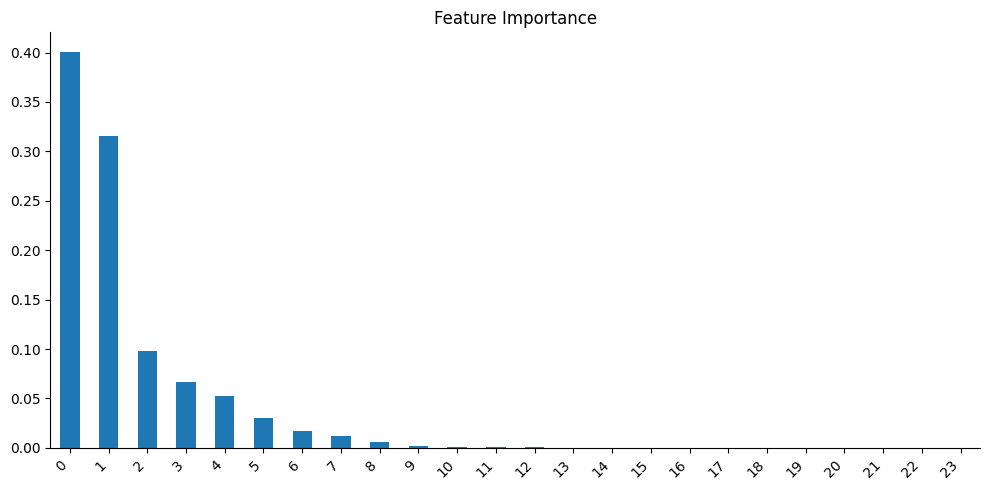

In [24]:
df_importance['importance'].plot(kind='bar', figsize=(10, 5), title='Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


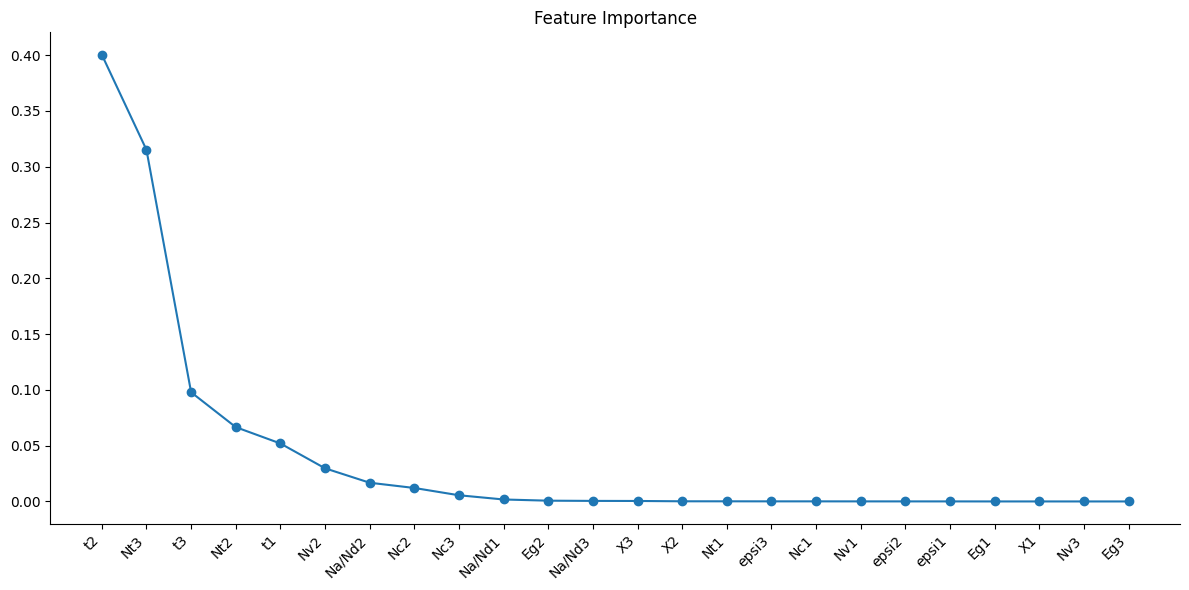

In [26]:
import matplotlib.pyplot as plt

# Assume df_importance already has 'names' as index
# If not:
# df_importance.set_index('names', inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot line with markers
ax.plot(df_importance.index, df_importance['importance'], marker='o')

# Set all ticks to be feature names
ax.set_xticks(range(len(df_importance.index)))
ax.set_xticklabels(df_importance.index, rotation=45, ha='right')

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Feature Importance')

plt.tight_layout()
plt.show()
